# Demo Scripts for the wfdb-python package

Run this notebook from the base directory of the git repository to access the included demo files

## Documentation Site

http://wfdb.readthedocs.io/

In [31]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

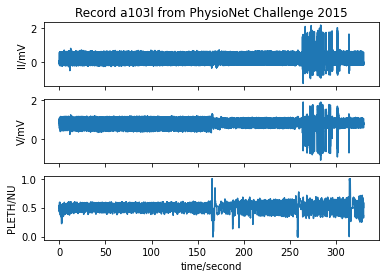

{'record_name': 'a103l',
 'n_sig': 3,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 82500,
 'base_time': None,
 'base_date': None,
 'comments': ['Asystole', 'False alarm'],
 'sig_name': ['II', 'V', 'PLETH'],
 'p_signal': array([[-0.02359597,  0.86758555,  0.48220271],
        [-0.03698082,  0.98298479,  0.5443735 ],
        [-0.06292259,  0.85979087,  0.47821229],
        ...,
        [-0.04084449,  0.7493346 ,  0.5150838 ],
        [-0.04719194,  0.7581749 ,  0.50957702],
        [-0.04677798,  0.7615019 ,  0.5028731 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a103l.mat', 'a103l.mat', 'a103l.mat'],
 'fmt': ['16', '16', '16'],
 'samps_per_frame': [1, 1, 1],
 'skew': [None, None, None],
 'byte_offset': [24, 24, 24],
 'adc_gain': [7247.0, 10520.0, 12530.0],
 'baseline': [0, 0, 0],
 'units': ['mV', 'mV', 'NU'],
 'adc_res': [16, 16, 16],
 'adc_zero': [0, 0, 0],
 'init_value': [-171, 9127, 6042],
 'checksum': [-27403, -301, -1739

In [32]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
record = wfdb.rdrecord('sample-data/a103l') 
wfdb.plot_wfdb(record=record, title='Record a103l from PhysioNet Challenge 2015') 
display(record.__dict__)

# Can also read the same files hosted on PhysioNet https://physionet.org/content/challenge-2015/1.0.0
# in the /training/ database subdirectory.
record2 = wfdb.rdrecord('a103l', pn_dir='challenge-2015/training/')

In [33]:
# Demo 2 - Read certain channels and sections of the WFDB record using the simplified 'rdsamp' function
# which returns a numpy array and a dictionary. Show the data.
signals, fields = wfdb.rdsamp('sample-data/s0010_re', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000)
display(signals)
display(fields)

# Can also read the same files hosted on Physionet
signals2, fields2 = wfdb.rdsamp('s0010_re', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000, pn_dir='ptbdb/patient001/')

array([[ 0.0335, -0.167 , -0.237 ,  0.1165],
       [ 0.0355, -0.1615, -0.2395,  0.119 ],
       [ 0.0385, -0.168 , -0.2465,  0.116 ],
       ...,
       [-0.0445,  0.008 ,  0.033 ,  0.045 ],
       [-0.044 ,  0.0175,  0.042 ,  0.052 ],
       [-0.044 ,  0.0245,  0.0365,  0.05  ]])

{'fs': 1000,
 'sig_len': 14900,
 'n_sig': 4,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV', 'mV', 'mV'],
 'sig_name': ['vz', 'i', 'avf', 'v5'],
 'comments': ['age: 81',
  'sex: female',
  'ECG date: 01/10/1990',
  'Diagnose:',
  'Reason for admission: Myocardial infarction',
  'Acute infarction (localization): infero-latera',
  'Former infarction (localization): no',
  'Additional diagnoses: Diabetes mellitus',
  'Smoker: no',
  'Number of coronary vessels involved: 1',
  'Infarction date (acute): 29-Sep-90',
  'Previous infarction (1) date: n/a',
  'Previous infarction (2) date: n/a',
  'Hemodynamics:',
  'Catheterization date: 16-Oct-90',
  'Ventriculography: Akinesia inferior wall',
  'Chest X-ray: Heart size upper limit of norm',
  'Peripheral blood Pressure (syst/diast):  140/80 mmHg',
  'Pulmonary artery pressure (at rest) (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (mean): n/a',
  'Pulmonary capillary wedge pressure (at rest): n/a',
  'Cardiac outp

In [34]:
# Demo 3 - Read a WFDB header file only (without the signals)
record = wfdb.rdheader('sample-data/drive02')
display(record.__dict__)

# Can also read the same file hosted on Physionet
record2 = wfdb.rdheader('drive02', pn_dir='drivedb')

{'record_name': 'drive02',
 'n_sig': 5,
 'fs': 15.5,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 78056,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG', 'foot GSR', 'HR', 'marker', 'RESP'],
 'p_signal': None,
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['drive02.dat',
  'drive02.dat',
  'drive02.dat',
  'drive02.dat',
  'drive02.dat'],
 'fmt': ['16', '16', '16', '16', '16'],
 'samps_per_frame': [32, 2, 1, 1, 2],
 'skew': [None, None, None, None, None],
 'byte_offset': [None, None, None, None, None],
 'adc_gain': [1000.0, 1000.0, 1.0001, 100.0, 500.0],
 'baseline': [0, 0, 0, 0, 0],
 'units': ['mV', 'mV', 'bpm', 'mV', 'mV'],
 'adc_res': [16, 16, 16, 16, 16],
 'adc_zero': [0, 0, 0, 0, 0],
 'init_value': [-1236, 1802, 75, 0, 5804],
 'checksum': [14736, 13501, -19070, -9226, -14191],
 'block_size': [0, 0, 0, 0, 0]}

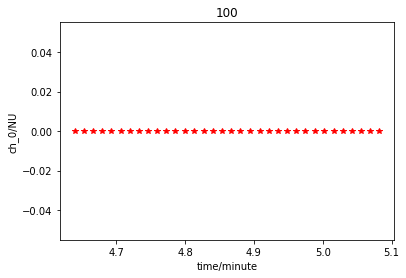

In [35]:
# Demo 4 - Read part of a WFDB annotation file into a wfdb.Annotation object, and plot the samples
annotation = wfdb.rdann('sample-data/100', 'atr', sampfrom=100000, sampto=110000)
annotation.fs = 360
wfdb.plot_wfdb(annotation=annotation, time_units='minutes')

# Can also read the same file hosted on PhysioNet 
annotation2 = wfdb.rdann('100', 'atr', sampfrom=100000, sampto=110000, pn_dir='mitdb')

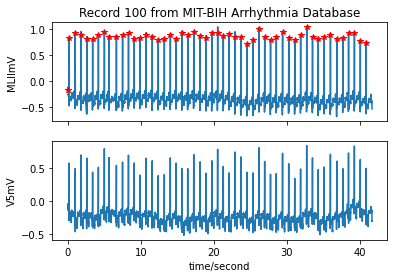

In [36]:
# Demo 5 - Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.
record = wfdb.rdrecord('sample-data/100', sampto = 15000)
annotation = wfdb.rdann('sample-data/100', 'atr', sampto = 15000)

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='Record 100 from MIT-BIH Arrhythmia Database',
               time_units='seconds')

### Multiple sample/frame examples

Although there can only be one base sampling frequency per record, a single WFDB record can store multiple channels with different sampling frequencies, as long as their sampling frequencies can all be expressed by an integer multiple of a base value. This is done by using the `samps_per_frame` attribute in each channel, which indicates the number of samples of each channel present in each frame.

ie: To capture three signals with sampling frequencies of 120, 240, and 360 Hz, in a single record, they can be combined into a record with `fs=120` and `samps_per_frame = [1, 2, 3]`.

#### Reading Options

This package allows signals in records with multiple samples/frame to be read in two ways:
1. smoothed - An uniform mxn numpy is returned as the d_signal or p_signal field. Channels with multiple samples/frame have their values averaged within each frame. This is like the behaviour of the `rdsamp` function of the original WFDB c package. Note that `wfdb.plot_record` only works if the record object has the `p_signals` field.
2. expanded - A list of 1d numpy arrays is returned as the e_d_signal or e_p_signal field. All samples for each channel are returned in its respective numpy array. The arrays may have different lengths depending on their `samps_per_frame` values.

Set the `smooth_frames` *(default=True)* option in `rdrecord` to return the desired signal type.

### Multisegment waveform examples

The following sections load and plots waveforms from the MIMIC matched waveform database. These waveforms have been matched to clinical data in the MIMIC Clinical database. The input records are multi-segment (made up of multiple individual WFDB records) and relatively long.

Note that these kinds of records contain segments in which certain channels are missing. <strong>matplotlib</strong> automatically zooms in on sections without Nans in individual channels but the entire durations of the signals input into <strong>plotrec</strong> are actually plotted. 



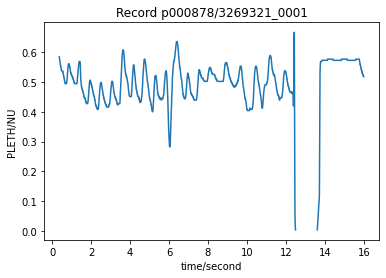

{'record_name': '3269321_0001',
 'n_sig': 1,
 'fs': 125,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 2000,
 'base_time': datetime.time(16, 57, 39),
 'base_date': None,
 'comments': [],
 'sig_name': ['PLETH'],
 'p_signal': array([[       nan],
        [       nan],
        [       nan],
        ...,
        [0.52156863],
        [0.51764706],
        [0.51764706]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['3269321_0001.dat'],
 'fmt': ['80'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [255.0],
 'baseline': [-128],
 'units': ['NU'],
 'adc_res': [8],
 'adc_zero': [0],
 'init_value': [-128],
 'checksum': [-25757],
 'block_size': [0]}

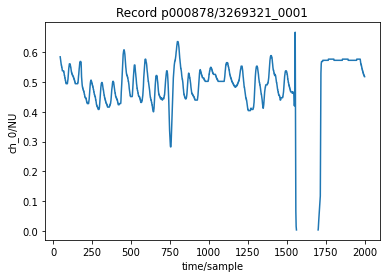

(array([[       nan],
        [       nan],
        [       nan],
        ...,
        [0.52156863],
        [0.51764706],
        [0.51764706]]),
 {'fs': 125,
  'sig_len': 2000,
  'n_sig': 1,
  'base_date': None,
  'base_time': datetime.time(16, 57, 39),
  'units': ['NU'],
  'sig_name': ['PLETH'],
  'comments': []})

In [37]:
# Demo 6 - Read the multi-segment record and plot waveforms from the MIMIC matched waveform database. 
record = wfdb.rdrecord('sample-data/multi-segment/p000878/3269321_0001')
wfdb.plot_wfdb(record=record, title='Record p000878/3269321_0001') 
display(record.__dict__)

# Can also read the same files hosted on PhysioNet (takes long to stream the many large files)
signals, fields = wfdb.rdsamp('3269321_0001', pn_dir = 'mimic3wdb/matched/p00/p000878')
wfdb.plot_items(signal=signals, fs=fields['fs'], title='Record p000878/3269321_0001')
display((signals, fields))

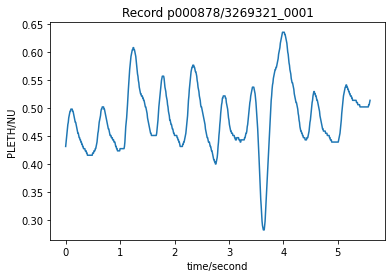

{'record_name': '3269321_0001',
 'n_sig': 1,
 'fs': 125,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 700,
 'base_time': datetime.time(16, 57, 41, 400000),
 'base_date': None,
 'comments': [],
 'sig_name': ['PLETH'],
 'p_signal': array([[0.43137255],
        [0.43921569],
        [0.44705882],
        [0.45490196],
        [0.4627451 ],
        [0.47058824],
        [0.4745098 ],
        [0.48235294],
        [0.48627451],
        [0.49019608],
        [0.49411765],
        [0.49411765],
        [0.49803922],
        [0.49803922],
        [0.49803922],
        [0.49803922],
        [0.49411765],
        [0.49411765],
        [0.49019608],
        [0.48627451],
        [0.48235294],
        [0.47843137],
        [0.4745098 ],
        [0.4745098 ],
        [0.47058824],
        [0.46666667],
        [0.4627451 ],
        [0.45882353],
        [0.45490196],
        [0.45490196],
        [0.45098039],
        [0.44705882],
        [0.44705882],
        [0.44313725],
        [0

In [38]:
# Demo 7 - Read the multi-segment record and plot waveforms from the MIMIC matched waveform database.
# Notice that some channels have no valid values to plot
record = wfdb.rdrecord('sample-data/multi-segment/p000878/3269321_0001',
                       sampfrom=300, sampto=1000)
wfdb.plot_wfdb(record, title='Record p000878/3269321_0001') 
display(record.__dict__)

# Can also read the same files hosted on Physionet
record2 = wfdb.rdrecord('3269321_0001', sampfrom=300, sampto=1000,
                        pn_dir = 'mimic3wdb/matched/p00/p000878')

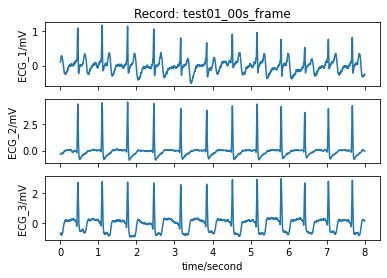

In [39]:
# Demo 8 - Read a WFDB record in which one channel has multiple samples/frame. Return a smoothed uniform array.
record = wfdb.rdrecord('sample-data/test01_00s_frame')
wfdb.plot_wfdb(record)

In [40]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

In [41]:
# Demo 9 - Read a WFDB record in which one channel has multiple samples/frame. Return a list of all the expanded samples.
record = wfdb.rdrecord('sample-data/test01_00s_frame', smooth_frames=False)

display(record.e_p_signal)
# Show that different channels have different lengths. Channel 1 has 2 samples/frame, hence has 2x as many samples.
print([len(s) for s in record.e_p_signal])

# wfdb.plotrec doesn't work because the Record object is missing its p_signals field.

[array([ 0.1 ,  0.11,  0.13, ..., -0.27, -0.27, -0.26]),
 array([-0.08, -0.57, -0.06, ...,  0.13, -0.18,  0.12]),
 array([-0.66, -0.66, -0.67, ...,  0.15,  0.15,  0.16])]

[4000, 8000, 4000]


## Writing Records and Annotations

In [42]:
# Demo 10 - Read a WFDB record's digital samples and create a copy via the wrsamp() instance method of the Record object.

# Read a record as a Record object.
record = wfdb.rdrecord('sample-data/100', physical=False)
record.record_name = '100x'

# Call the instance method of the object
record.wrsamp()

# The new file can be read
record_x = wfdb.rdrecord('100x')

# Cleanup: delete the created files
# os.remove('100x.hea')
# os.remove('100.dat')

In [43]:
# Demo 11 - Write a WFDB record without using a Record object via the gateway wrsamp function.
# This is the basic way to write physical signals to a WFDB file. 

# Read part of a record from Physionet
sig, fields = wfdb.rdsamp('a103l', sampfrom=50000, channels=[0,1], pn_dir='challenge-2015/training')

# Call the gateway wrsamp function, manually inserting fields as function input parameters
wfdb.wrsamp('ecg-record', fs=250, units=['mV', 'mV'], sig_name=['I', 'II'], p_signal=sig, fmt=['16', '16'])

# The new file can be read
record = wfdb.rdrecord('ecg-record')

# Cleanup: delete the created files
# os.remove('ecg-record.hea')
# os.remove('ecg-record.dat')

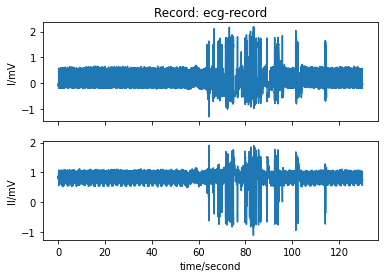

In [44]:
wfdb.plot_wfdb(record)

In [45]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath


import wfdb

In [46]:
# Demo 12 - Write a WFDB record with multiple samples/frame in a channel

# Read a record as a Record object.
record = wfdb.rdrecord('sample-data/test01_00s_frame', physical=False, smooth_frames=False)
record.record_name = 'test01_00s_framex'

# Call the instance method of the object with expanded=True to write the record using the e_d_signal field
record.wrsamp(expanded=True)

# The new file can be read
recordx = wfdb.rdrecord('test01_00s_framex')

# Cleanup: deleted the created files
# os.remove('test01_00s_framex.hea')
# os.remove('test01_00s.dat')

In [47]:
# Demo 13 - Read a WFDB annotation file and create a copy via the wrann() instance method
# of the Annotation object

# Read an annotation from Physionet
annotation = wfdb.rdann('sample-data/100', 'atr')
annotation.extension = 'cpy'

# Call the instance method of the object
annotation.wrann()

# The new file can be read
annotation_copy = wfdb.rdann('100', 'cpy')

# Cleanup: deleted the created files
# os.remove('100.cpy')

In [48]:
# Demo 14 - Write a WFDB annotation file without using an Annotator
# object via the gateway wrann function.

# Read an annotation as an Annotation object
annotation = wfdb.rdann('b001', 'atr', pn_dir='cebsdb')

# Call the gateway wrann function, manually inserting fields as function input parameters
wfdb.wrann('b001', 'cpy', annotation.sample, annotation.symbol)

# The new file can be read
annotation_copy = wfdb.rdann('b001', 'cpy')

# Cleanup: deleted the created files
# os.remove('b001.cpy')

In [49]:
# Demo 15 - View the standard WFDB annotation labels
wfdb.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

## Downloading Content from Physionet

- The downloads are made via http
- See the above demos for examples on streaming WFDB files stored in PhysioNet without downloading them to local disk
- PhysioNet has rsync modules for downloading entire databases for users who have access to rsync.  

In [50]:
# Demo 16 - List the PhysioNet Databases

dbs = wfdb.get_dbs()
display(dbs)

[['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['accelerometry-walk-climb-drive',
  'Labeled raw accelerometry data captured during walking, stair climbing and driving'],
 ['actes-cycloergometer-exercise',
  'Cardiorespiratory measurement from graded cycloergometer exercise testing'],
 ['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['afdb', 'MIT-BIH Atrial Fibrillation Database'],
 ['afpdb', 'PAF Prediction Challenge Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database Sample Excluded Record'],
 ['annotation-opioid-use-notes',
  'Annotation dataset of problematic opioid use and related contexts from MIMIC-III Critical Care Database discharge summaries'],
 ['antimicrobial-resistance-uti',
  'AMR-UTI: Antimicrobial Resistance in Urinary Tract Infections'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['auditory-eeg', 'Auditory evoked potential EEG-Biometric dataset'],
 ['autonomic-aging-cardiovascular',
  'Autonomic Aging: A dataset to quantify ch

In [51]:
# Demo 17 - Download all the WFDB records and annotations from a small PhysioNet Database

# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')

# Download all the WFDB content
wfdb.dl_database('ahadb', dl_dir=dl_dir)

# Display the downloaded content in the folder
display(os.listdir(dl_dir))

# Cleanup: delete the downloaded directory
# shutil.rmtree(dl_dir)

Generating record list for: 0001
Generating record list for: 0201
Generating list of all files for: 0001
Generating list of all files for: 0201
Created local base download directory: C:\Users\flopp\PycharmProjects\wfdb-python\tmp_dl_dir
Finished downloading files


['0001.atr', '0001.dat', '0001.hea', '0201.atr', '0201.dat', '0201.hea']

In [52]:
# Demo 18 - Download specified files from a PhysioNet database

# The files to download
file_list = ['STAFF-Studies-bibliography-2016.pdf',
             'data/001a.hea',
             'data/001a.dat',
             'data/001b.hea',
             'data/001b.dat']

# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')

# Download the listed files
wfdb.dl_files('staffiii', dl_dir, file_list)

# Display the downloaded content in the folder
display(os.listdir(dl_dir))
display(os.listdir(os.path.join(dl_dir, 'data')))

# Cleanup: delete the downloaded directory
# shutil.rmtree(dl_dir)

Finished downloading files


['0001.atr',
 '0001.dat',
 '0001.hea',
 '0201.atr',
 '0201.dat',
 '0201.hea',
 'data',
 'STAFF-Studies-bibliography-2016.pdf']

['001a.dat', '001a.hea', '001b.dat', '001b.hea']

## ECG Processing

In [53]:
import wfdb
from wfdb import processing

C:\Users\flopp\AppData\Local\Temp\ipykernel_14164\2857615989.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rx" (-> marker='x'). The keyword argument will take precedence.
  ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x',
C:\Users\flopp\AppData\Local\Temp\ipykernel_14164\2857615989.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x',


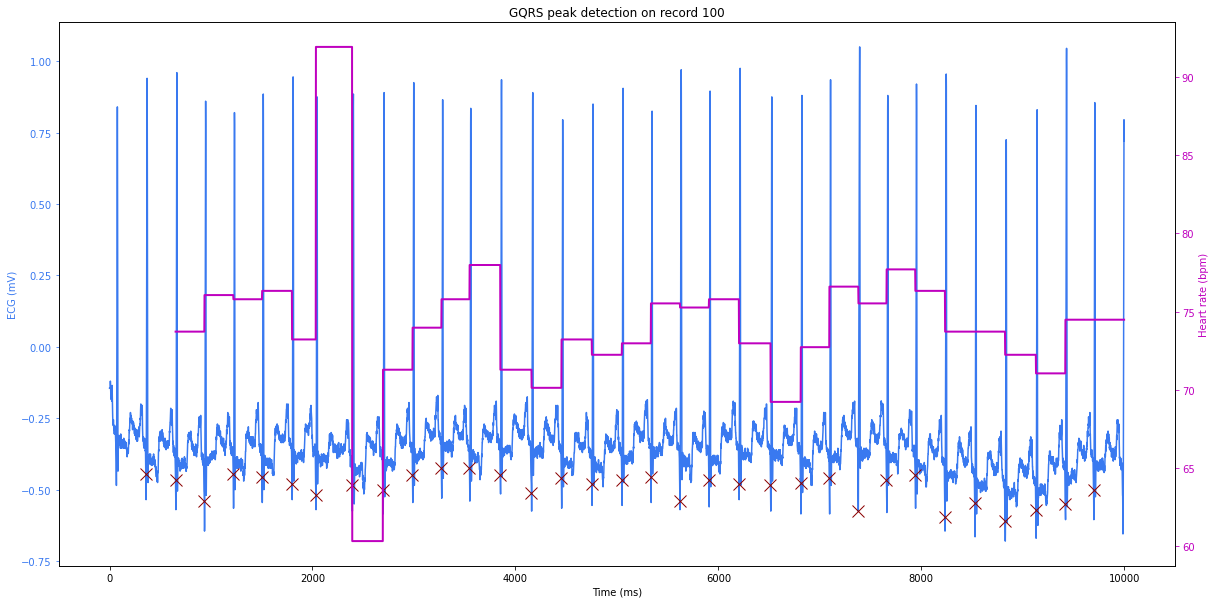

Corrected GQRS detected peak indices: [370, 663, 947, 1231, 1515, 1809, 2045, 2403, 2706, 2998, 3283, 3560, 3863, 4171, 4466, 4765, 5061, 5347, 5634, 5919, 6215, 6527, 6824, 7106, 7393, 7670, 7953, 8246, 8539, 8837, 9142, 9432, 9710]


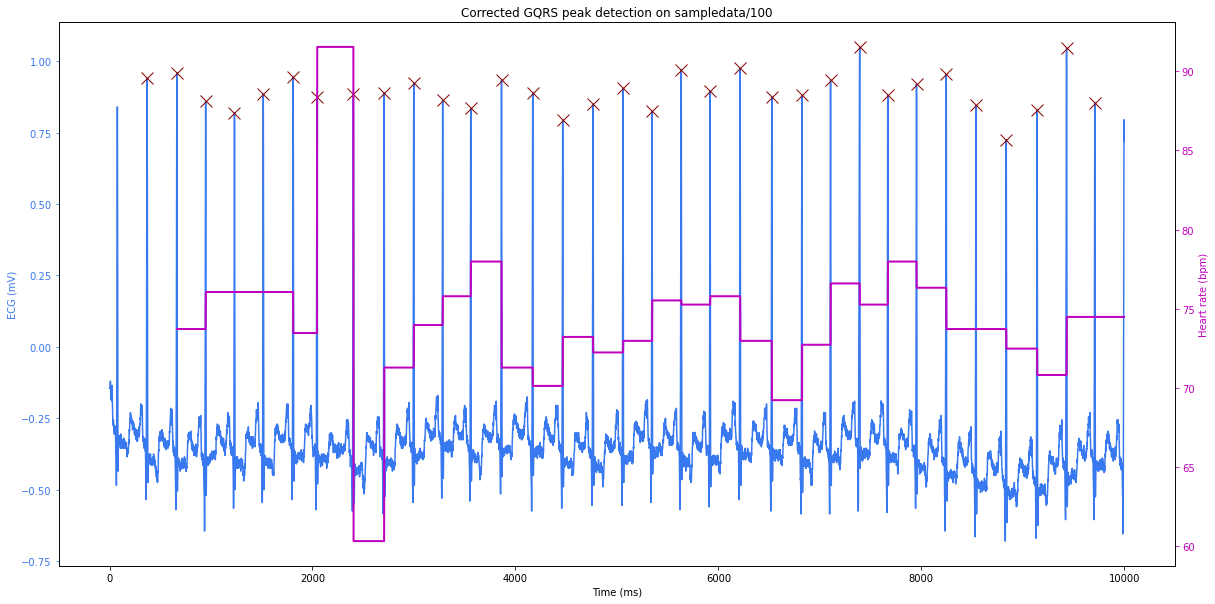

In [54]:
# Demo 19 - Use the GQRS detection algorithm and correct the peaks

def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

# Load the WFDB record and the physical samples
record = wfdb.rdrecord('sample-data/100', sampfrom=0, sampto=10000, channels=[0])

# Use the GQRS algorithm to detect QRS locations in the first channel
qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

# Plot results
peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
         title="GQRS peak detection on record 100")
    
# Correct the peaks shifting them to local maxima
min_bpm = 20
max_bpm = 230
#min_gap = record.fs * 60 / min_bpm
# Use the maximum possible bpm as the search radius
search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0], 
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius, 
                                                     smooth_window_size=150)

# Display results
print('Corrected GQRS detected peak indices:', sorted(corrected_peak_inds))
peaks_hr(sig=record.p_signal, peak_inds=sorted(corrected_peak_inds), fs=record.fs,
         title="Corrected GQRS peak detection on sampledata/100")
    

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
51 reference annotations, 51 test annotations

True Positives (matched samples): 51
False Positives (unmatched test samples): 0
False Negatives (unmatched reference samples): 0

Sensitivity: 1.0000 (51/51)
Positive Predictivity: 1.0000 (51/51)


C:\Users\flopp\PycharmProjects\wfdb-python\wfdb\processing\evaluate.py:403: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


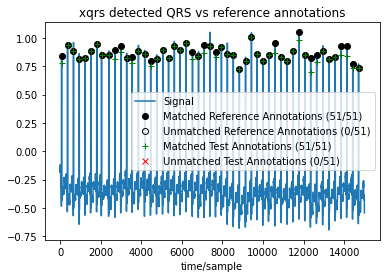

In [55]:
# Demo 20 - Use the XQRS detection algorithm and compare results to reference annotations
import wfdb
from wfdb import processing
sig, fields = wfdb.rdsamp('sample-data/100', channels=[0], sampto=15000)
ann_ref = wfdb.rdann('sample-data/100','atr', sampto=15000)

# Run QRS detection on signal
xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()
# Alternatively, use the gateway function to get the QRS indices directly
# qrs_inds = processing.xqrs_detect(sig=sig[:,0], fs=fields['fs'])

# Compare detected QRS complexes to reference annotation.
# Note, first sample in 100.atr is not a QRS.
comparitor = processing.compare_annotations(ref_sample=ann_ref.sample[1:],
                                            test_sample=xqrs.qrs_inds,
                                            window_width=int(0.1 * fields['fs']),
                                            signal=sig[:,0])

# Print and plot the results
comparitor.print_summary()
comparitor.plot(title='xqrs detected QRS vs reference annotations')

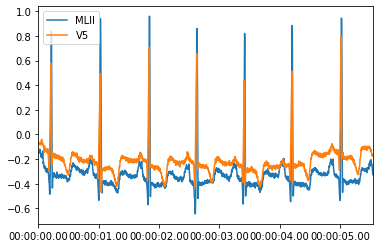

In [56]:
# Demo 21 - Convert records to dataframes
import wfdb
record = wfdb.rdrecord('sample-data/100', sampto=2000)
df = record.to_dataframe()
df.plot();

In [57]:
# Cleanup for all demos
for file in ['100x.hea', '100.dat',  # demo 10
             'ecg-record.hea', 'ecg-record.dat',  # demo 11 
             'test01_00s_framex.hea', 'test01_00s.dat',  # demo 12
             '100.cpy',  # demo 13
             'b001.cpy',  # demo 14
            ]:
    if os.path.isfile(file):
        os.remove(file)

dl_dir = os.path.join(cwd, 'tmp_dl_dir')  # demo 17, 18
if os.path.isdir(dl_dir):
    shutil.rmtree(dl_dir)

In [58]:
import wfdb
record_no_skew = wfdb.rdrecord('sample-data/test01_00s_skewframe',
                               physical=False,
                               smooth_frames=False, ignore_skew=True)
record_no_skew.wrsamp(expanded=True)

In [59]:
import numpy as np
int_types = (int, np.int64, np.int32, np.int16, np.int8)

int_types[0]('10')

10